2. vizualizace dat

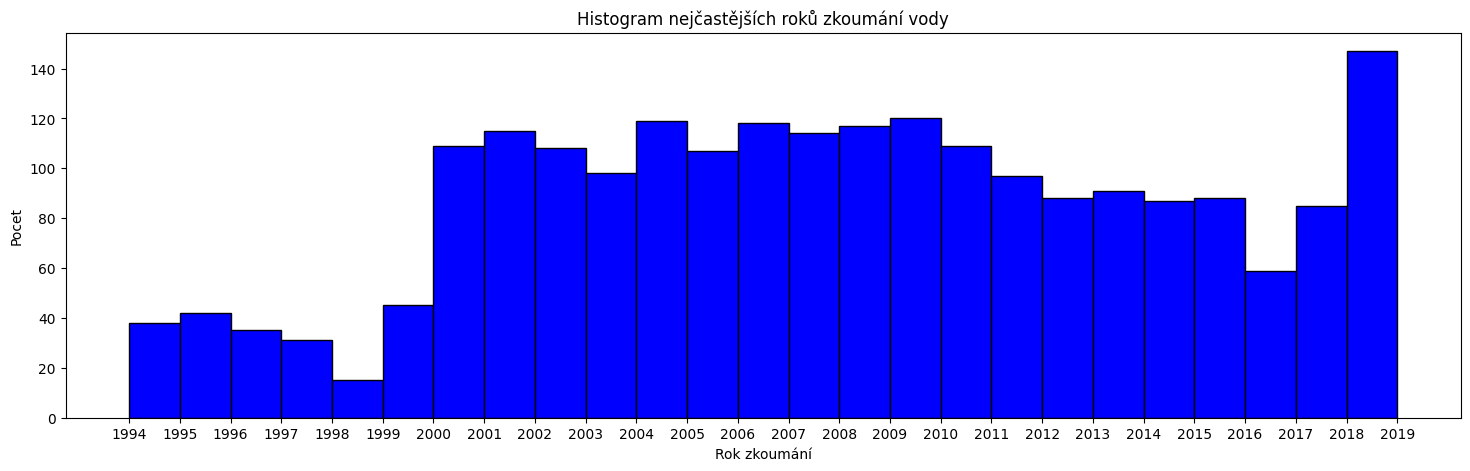

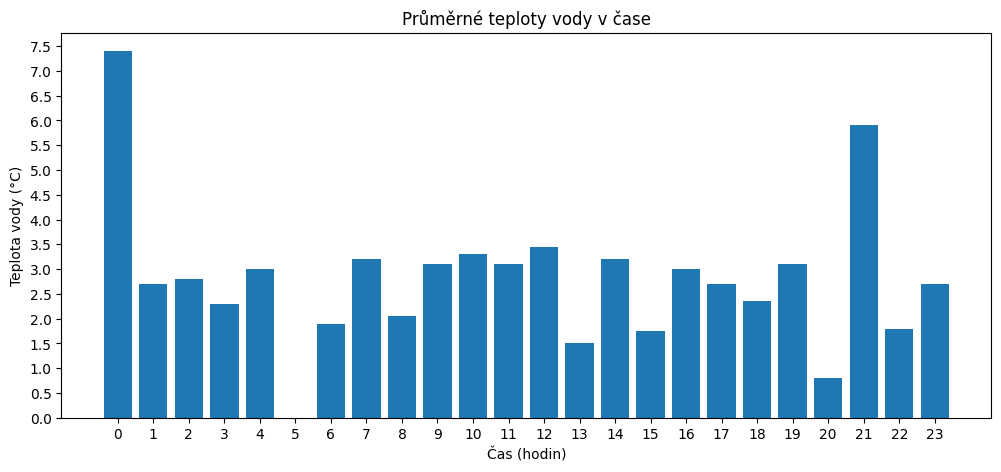

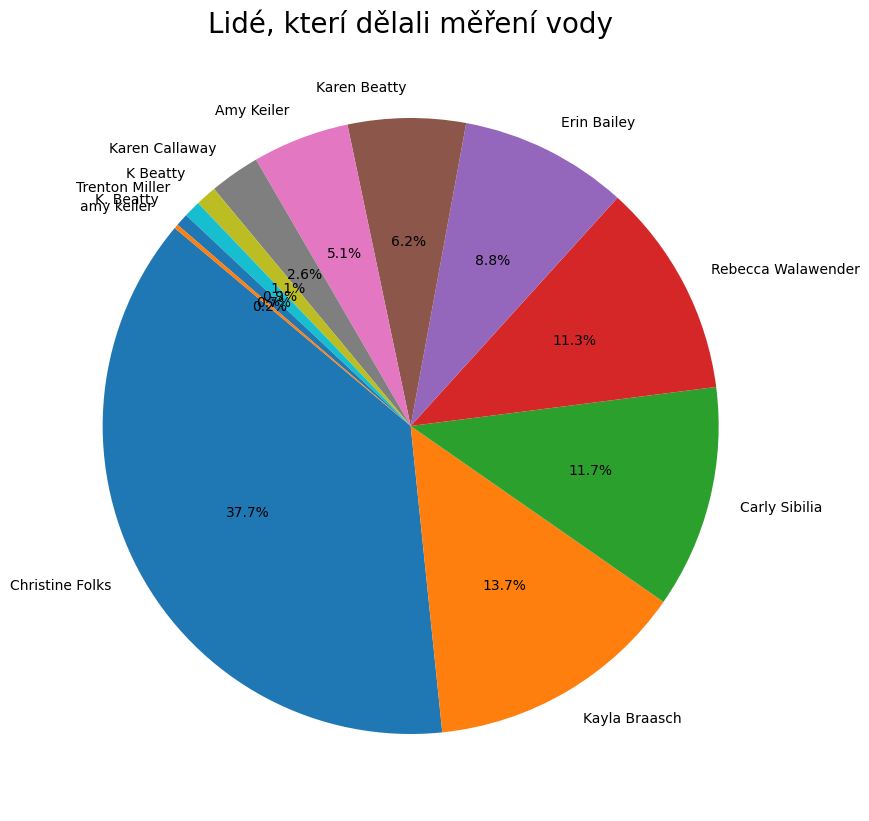

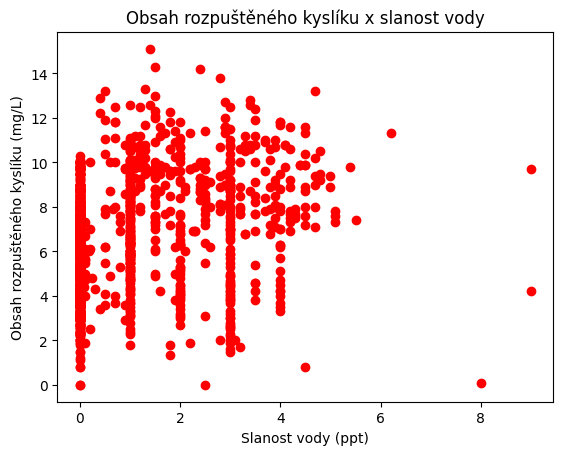

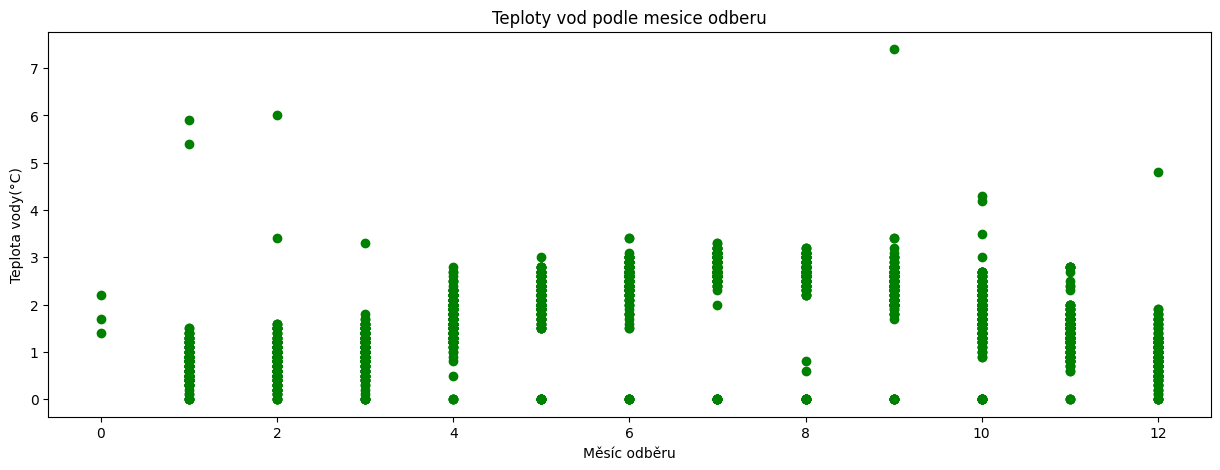

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Načtení datové sady
data = pd.read_csv('BKB_WaterQualityData_2020084.csv',engine='python')
# Přehled datové sady
#print(data.head())

#histogram
data['rok_odberu'] = (pd.to_datetime(data['Read_Date'],format='%m/%d/%Y').dt.year.fillna(0)).round(0).astype('int64')
filtr_dat = data.query('rok_odberu != 0')
#print(data['rok_odberu'].head())
plt.figure(figsize=(18,5))
plt.hist(filtr_dat['rok_odberu'],bins=range(1994,max(data['rok_odberu'])+1,1),color='blue',edgecolor='black')
plt.title('Histogram nejčastějších roků zkoumání vody')
plt.xlabel('Rok zkoumání')
plt.ylabel('Pocet')
plt.xticks(range(1994, max(data['rok_odberu'])+1, 1))
plt.show()

#sloupcový graf
data['Water_Temp'] = data['Water Temp (?C)'].fillna(0).astype(float)
filtr_dat = data.query('Water_Temp != 0')
#print(filtr_dat['Water_Temp'].head())
data['Time_data'] = pd.to_datetime(data['Time (24:00)'],errors='coerce').dt.strftime('%H').fillna(0).astype('int64')
filtr_dat = data.query('Time_data != 0')
filtr_dat = data.dropna(subset=['Water Temp (?C)','Time_data'])
#print(data['Time_data'].head())
plt.figure(figsize=(12,5))
plt.bar(filtr_dat['Time_data'],filtr_dat['Water_Temp']*0.1)
plt.title('Průměrné teploty vody v čase')
plt.xlabel('Čas (hodin)')
plt.ylabel('Teplota vody (°C)')
plt.xticks(range(min(data['Time_data']), max(data['Time_data'])+1, 1))
plt.yticks(np.arange(0,8,0.5))
plt.show()

#Koláčový graf
pocty = data['WhoVerified'].value_counts()
labels = pocty.index
plt.figure(figsize=(10,10))
patches, texts, autotexts = plt.pie(data['WhoVerified'].value_counts(), labels=labels, autopct='%1.1f%%',startangle=140)
plt.title('Lidé, kterí dělali měření vody',fontsize=20)
pismo = fm.FontProperties()
pismo.set_size('medium')
plt.setp(texts,fontproperties=pismo)
plt.show()

#Liniový graf
plt.scatter(data['Salinity (ppt)'], data['Dissolved Oxygen (mg/L)'], color='red')
plt.title('Obsah rozpuštěného kyslíku x slanost vody')
plt.xlabel('Slanost vody (ppt)')
plt.ylabel('Obsah rozpuštěného kyslíku (mg/L)')
plt.show()

#Bodový graf
data['mesic_odberu'] = (pd.to_datetime(data['Read_Date'],format='%m/%d/%Y')).dt.strftime('%m').fillna(0).astype('int64')
#print(data['mesic_odberu'])
filtr_dat = data.query('mesic_odberu != 0')
data['Water Temp (?C)'] = data['Water Temp (?C)'].fillna(0).round(0).astype(float)
#data['Air Temp-Celsius'] = data['Air Temp-Celsius'].fillna(0).round(0).astype(float)
filtr_dat = data.dropna(subset=['Water Temp (?C)','Water Depth (m)'])
plt.figure(figsize=(15,5))
plt.scatter(filtr_dat['mesic_odberu'].fillna(0).astype('int64'),filtr_dat['Water Temp (?C)']*0.1, marker='o', color='green')
plt.title('Teploty vod podle mesice odberu')
plt.xlabel('Měsíc odběru')
plt.ylabel('Teplota vody(°C)')
plt.show()